In [1]:
with open("./in.pnm") as f:
	lines = f.readlines()
	format = lines[0].strip()
	num_channels = 1 if format == "P2" else 3
	width, height = map(int, lines[1].strip().split())

	print(f"width = {width}, height = {height}, num_channels = {num_channels}")
	print("width * height = ", width * height)
	print("width * height * num_channels = ", width * height * num_channels)

	data_1 = list(map(int, lines[3].strip().split()))
	data_2 = list(map(int, lines[4].strip().split()))
	data_n = list(map(int, lines[-1].strip().split()))

	num_data_elements = 0
	for line in lines[3:]:
		data = list(map(int, line.strip().split()))
		num_data_elements += len(data)
	print("num_data_elements = ", num_data_elements)
	assert num_data_elements == width * height * num_channels, \
     		"Error: number of data elements does not match"
 
	print("Number of data lines = ", len(lines[3:]))

	# Check if 3 consecutive line have the same number of elements
	NUM_ELE_PER_3_LINES = 512 * 3
	check = 0
	curr_sum = 0
	for data_line in lines[3:]:
		data = list(map(int, data_line.strip().split()))
		curr_sum += len(data)
		check += 1
		if check == 3:
			if curr_sum != NUM_ELE_PER_3_LINES:
				print("Error: 3 consecutive lines do not have the same number of elements")
				break
			check = 0
			curr_sum = 0

width = 512, height = 512, num_channels = 3
width * height =  262144
width * height * num_channels =  786432
num_data_elements =  786432
Number of data lines =  1536


In [2]:
len(data_1), len(data_2), len(data_n)

(570, 567, 393)

In [3]:
1539 - 4 + 1

1536

In [4]:
570 * 1536

875520

In [5]:
1536 // 3

512

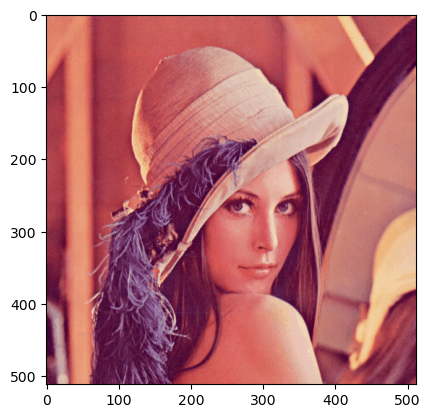

In [6]:
# Read .pnm file and construct to 3 channel image and show it
import numpy as np
import matplotlib.pyplot as plt

def read_pnm_file(file_path):
	with open(file_path) as f:
		lines = f.readlines()
		format = lines[0].strip()
		num_channels = 1 if format == "P2" else 3
		width, height = map(int, lines[1].strip().split())

		data = []
		for line in lines[3:]:
			data += list(map(int, line.strip().split()))

		data = np.array(data).reshape(height, width, num_channels)
		return data

def show_image(data):
	if data.shape[2] == 1:
		data = data[:, :, 0]
	plt.imshow(data)
	plt.show()


data = read_pnm_file("./in.pnm")
show_image(data)

In [7]:
w = 2; h = 2; c = 3
a = np.arange(w * h * c)#.reshape(h, w, c)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [8]:
a.reshape(h, w, c)

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])